In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("generated/coefficients.csv")

hurdle_coefficients_data = data.loc[data['ModelType'] == 'Hurdle']

significant_hurdle = hurdle_coefficients_data.loc[hurdle_coefficients_data['PValue'] < 0.05]

coefficients_data = data.loc[data['ModelType'] == "Non-Hurdle"]

significant_data = coefficients_data.loc[coefficients_data['PValue'] < 0.05]

data.head()

,ProjectName,PRs,PValue,R2,Coefficient,PercentageExplained,ModelType
0,OPM/opm-parser,56,0.083411,0.385504,-0.877525,61.449646,Non-Hurdle
1,RestKit/RestKit,39,0.263742,0.469272,0.584277,53.072843,Non-Hurdle
2,OSU-Net/cyder,30,0.978804,0.502756,0.021498,49.724429,Non-Hurdle
3,Theano/Theano,170,0.158707,0.222405,-0.445251,77.759497,Non-Hurdle
4,PCSX2/pcsx2,54,0.887183,0.336805,0.058147,66.319481,Non-Hurdle


In [2]:
data.tail()

,ProjectName,PRs,PValue,R2,Coefficient,PercentageExplained,ModelType
421,notepadqq/notepadqq,10,NaN,NaN,NaN,NaN,Hurdle
422,whatwg/dom,42,0.393496,0.560351,-0.350921,1.437327,Hurdle
423,marionettejs/backbone.marionette,20,0.743506,NaN,-0.301496,0.719694,Hurdle
424,SonarSource/sonar-java,104,0.045920,0.423433,-0.760812,5.416376,Hurdle
425,Netflix/eureka,40,0.242264,NaN,0.475238,2.987582,Hurdle


# Plots for the linear models

These models predict the number of effective comments per PR. 

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,4))

plt.scatter(coefficients_data['R2'], coefficients_data['PValue'], c=np.log(coefficients_data["PRs"]))

clb = plt.colorbar()
clb.ax.set_title('log(#PRs)')

plt.xlabel("R2 of model")
plt.ylabel("Significance of Travis introduction")

plt.title("How significant is Travis, and how good is the model fit")

plt.axhline(y=0.05, color='r', linestyle='-', linewidth=0.5)

plt.show()

<Figure size 900x400 with 2 Axes>

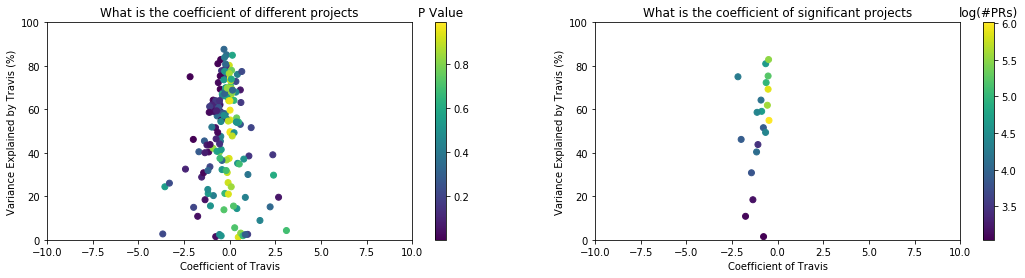

In [4]:
plt.figure(figsize=(18,4))

plt.subplot(1, 2, 1)

plt.scatter(coefficients_data['Coefficient'], coefficients_data['PercentageExplained'], c=coefficients_data["PValue"])

clb = plt.colorbar()
clb.ax.set_title('P Value')

plt.xlabel("Coefficient of Travis")
plt.ylabel("Variance Explained by Travis (%)")

plt.xlim(-10,10)
plt.ylim(0,100)

plt.title("What is the coefficient of different projects")

plt.subplot(1, 2, 2)



plt.scatter(significant_data['Coefficient'], significant_data['PercentageExplained'], c=np.log(significant_data["PRs"]))

clb = plt.colorbar()
clb.ax.set_title('log(#PRs)')

plt.xlabel("Coefficient of Travis")
plt.ylabel("Variance Explained by Travis (%)")

plt.xlim(-10,10)
plt.ylim(0,100)


plt.title("What is the coefficient of significant projects")

plt.show()

In [5]:
print("There are {} significant projects, {} for which a model has been built, out of 390 projects with enough data for R analysis".
      format(len(significant_data), len(coefficients_data)))

There are 20 significant projects, 186 for which a model has been built, out of 390 projects with enough data for R analysis


In [6]:
# Negative impact
significant_data.sort_values(by=["Coefficient"]).head(10)

,ProjectName,PRs,PValue,R2,Coefficient,PercentageExplained,ModelType
43,crate/crate,71,0.003171,0.250167,-2.168183,74.983284,Non-Hurdle
122,Yelp/mrjob,50,0.001566,0.538282,-1.992602,46.171753,Non-Hurdle
63,geonetwork/core-geonetwork,22,0.040929,0.891941,-1.752924,10.805936,Non-Hurdle
105,scala/scala-lang,46,0.019026,0.691732,-1.428911,30.826765,Non-Hurdle
175,qooxdoo/qooxdoo,24,0.044414,0.815691,-1.349708,18.430928,Non-Hurdle
45,DGtal-team/DGtal,60,0.029756,0.596013,-1.148920,40.398700,Non-Hurdle
141,scummvm/scummvm,81,0.020347,0.413768,-1.122096,58.623248,Non-Hurdle
112,Elgg/Elgg,32,0.037587,0.561951,-1.073971,43.804891,Non-Hurdle
59,ipa320/cob_robots,65,0.016502,0.357437,-0.905617,64.256272,Non-Hurdle
107,praekelt/vumi,108,0.041342,0.409242,-0.869289,59.075783,Non-Hurdle


In [7]:
# Positive impact
significant_data.sort_values(by=["Coefficient"], ascending=False).head()

,ProjectName,PRs,PValue,R2,Coefficient,PercentageExplained,ModelType
85,symfony/symfony-docs,407,0.003294,0.450822,-0.467920,54.917834,Non-Hurdle
58,hrydgard/ppsspp,245,0.003185,0.171013,-0.491176,82.898742,Non-Hurdle
78,nim-lang/Nim,186,0.007080,0.246651,-0.516864,75.334874,Non-Hurdle
32,cakephp/docs,358,0.000387,0.307436,-0.517368,69.256446,Non-Hurdle
75,mne-tools/mne-python,266,0.044961,0.381136,-0.557010,61.886434,Non-Hurdle


In [8]:
# What is a random project showing an average effect
significant_data.sort_values(by=["Coefficient"], ascending=False).iloc[[15]]

,ProjectName,PRs,PValue,R2,Coefficient,PercentageExplained,ModelType
175,qooxdoo/qooxdoo,24,0.044414,0.815691,-1.349708,18.430928,Non-Hurdle


# Plots for the hurdle models

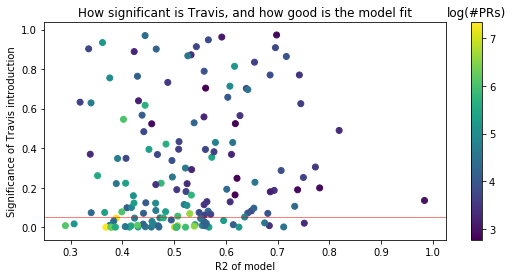

In [9]:
plt.figure(figsize=(9,4))

plt.scatter(hurdle_coefficients_data['R2'], hurdle_coefficients_data['PValue'], c=np.log(hurdle_coefficients_data["PRs"]))

clb = plt.colorbar()
clb.ax.set_title('log(#PRs)')

plt.xlabel("R2 of model")
plt.ylabel("Significance of Travis introduction")

plt.title("How significant is Travis, and how good is the model fit")

plt.axhline(y=0.05, color='r', linestyle='-', linewidth=0.5)

plt.show()

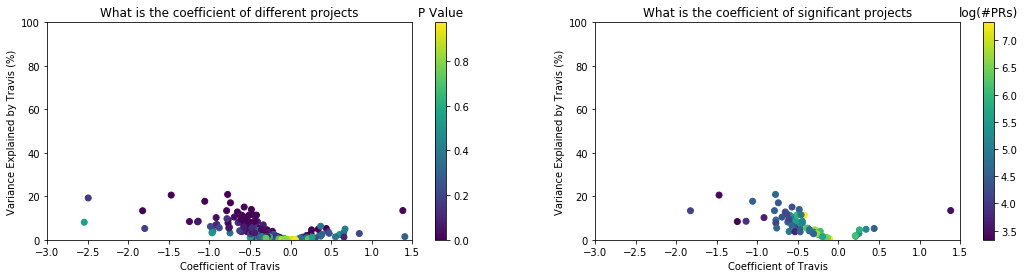

In [10]:
plt.figure(figsize=(18,4))

plt.subplot(1, 2, 1)

plt.scatter(hurdle_coefficients_data['Coefficient'], hurdle_coefficients_data['PercentageExplained'], c=hurdle_coefficients_data["PValue"])

clb = plt.colorbar()
clb.ax.set_title('P Value')

plt.xlabel("Coefficient of Travis")
plt.ylabel("Variance Explained by Travis (%)")

plt.xlim(-3,1.5)
plt.ylim(0,100)

plt.title("What is the coefficient of different projects")

plt.subplot(1, 2, 2)



plt.scatter(significant_hurdle['Coefficient'], significant_hurdle['PercentageExplained'], c=np.log(significant_hurdle["PRs"]))

clb = plt.colorbar()
clb.ax.set_title('log(#PRs)')

plt.xlabel("Coefficient of Travis")
plt.ylabel("Variance Explained by Travis (%)")

plt.xlim(-3,1.5)
plt.ylim(0,100)


plt.title("What is the coefficient of significant projects")

plt.show()

In [11]:
print("There are {} significant projects, {} for which a model has been built, out of 390 projects with enough data for R analysis".
      format(len(significant_hurdle), len(hurdle_coefficients_data)))

hurdle_large_neg = significant_hurdle.loc[significant_hurdle["Coefficient"] < -0.5]
hurdle_neg_to_pos = significant_hurdle.loc[significant_hurdle["Coefficient"] >= -0.5]

There are 63 significant projects, 240 for which a model has been built, out of 390 projects with enough data for R analysis


## Does significance for Hurdle and non hurdle agree?

In [12]:
hurdle_sig_slugs = set(significant_hurdle["ProjectName"])
sig_slugs = set(significant_data["ProjectName"])

print("There are {} hurdle sig projects, {} linear sig projects".format(len(hurdle_sig_slugs), len(sig_slugs)))

print("Interaction between the two sets is {}".format(len(sig_slugs.intersection(hurdle_sig_slugs))))

There are 63 hurdle sig projects, 20 linear sig projects
Interaction between the two sets is 6


# What if we look at the data

In [13]:
# Add empty columns

non_significant_data = coefficients_data.loc[coefficients_data["PValue"] >= 0.05]
non_sig_hurdle_data = hurdle_coefficients_data.loc[hurdle_coefficients_data["PValue"] >= 0.05]

pd.options.mode.chained_assignment = None

def add_column(name, initial_value=np.nan):
    significant_data[name] = initial_value
    non_significant_data[name] = initial_value

add_column("GeneralComments_mean")
add_column("GeneralComments_median")

# Init Mongo collections

from pymongo import MongoClient
from bson.objectid import ObjectId

mongo_client = MongoClient()
database = mongo_client["graduation"]
pull_requests_collection = database["pull_requests"]
projects_collection = database["projects"]
commits_collection = database["commits"]

# Set the columns

def write_val(data_frame, column_name, method):
    for index, row in data_frame.iterrows():
        data_frame.loc[index, column_name] = method(row["ProjectName"])
        
from statistics import mean, median
        
def compute_general_comments_mean(slug):
    project_owner = slug.split("/")[0]
    project_name= slug.split("/")[1]
    
    query = [
        {
            '$match': {
                'project_owner': project_owner,
                'project_name': project_name
            }
        },
        {
            '$project': {
                'numberOfGenComments': {
                    '$size': '$raw_comments'
                } 
            }
        }
    ]
    
    general_comments_size = [item["numberOfGenComments"] for item in pull_requests_collection.aggregate(query)]
    
    return mean(general_comments_size)

def compute_general_comments_median(slug):
    project_owner = slug.split("/")[0]
    project_name= slug.split("/")[1]
    
    query = [
        {
            '$match': {
                'project_owner': project_owner,
                'project_name': project_name
            }
        },
        {
            '$project': {
                'numberOfGenComments': {
                    '$size': '$raw_comments'
                } 
            }
        }
    ]
    
    general_comments_size = [item["numberOfGenComments"] for item in pull_requests_collection.aggregate(query)]
    
    return median(general_comments_size)

write_val(significant_data, 'GeneralComments_mean', compute_general_comments_mean)
write_val(non_significant_data, 'GeneralComments_mean', compute_general_comments_mean)

write_val(significant_data, 'GeneralComments_median', compute_general_comments_median)
write_val(non_significant_data, 'GeneralComments_median', compute_general_comments_median)

In [14]:
significant_data.head()

,ProjectName,PRs,PValue,R2,Coefficient,PercentageExplained,ModelType,GeneralComments_mean,GeneralComments_median
5,PX4/Firmware,104,0.007539,0.190136,-0.647716,80.986450,Non-Hurdle,3.789206,1.0
27,buildbot/buildbot,147,0.022881,0.277058,-0.624305,72.294186,Non-Hurdle,3.460715,2.0
32,cakephp/docs,358,0.000387,0.307436,-0.517368,69.256446,Non-Hurdle,1.163192,1.0
43,crate/crate,71,0.003171,0.250167,-2.168183,74.983284,Non-Hurdle,1.091373,1.0
45,DGtal-team/DGtal,60,0.029756,0.596013,-1.148920,40.398700,Non-Hurdle,3.639588,2.0


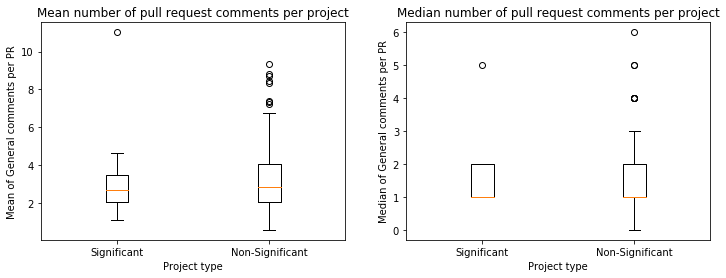

In [15]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)

plt.boxplot([significant_data["GeneralComments_mean"], non_significant_data["GeneralComments_mean"]])
plt.xticks([1, 2], ["Significant", "Non-Significant"])

plt.xlabel("Project type")
plt.ylabel("Mean of General comments per PR")

plt.title("Mean number of pull request comments per project")

plt.subplot(1, 2, 2)


plt.boxplot([significant_data["GeneralComments_median"], non_significant_data["GeneralComments_median"]])
plt.xticks([1, 2], ["Significant", "Non-Significant"])

plt.xlabel("Project type")
plt.ylabel("Median of General comments per PR")

plt.title("Median number of pull request comments per project")

plt.show()

# Data chrunching for time series

In [16]:
from datetime import datetime, timedelta
import effective_comments.find_effective as eff
    
def metrics_for_project_names(project_names):

    mongo_client = MongoClient()
    database = mongo_client["graduation"]
    pull_requests_collection = database["pull_requests"]
    projects_collection = database["projects"]
    commits_collection = database["commits"]
        
        
    period = 30
    periods = 24

    metrics = [[] for x in range(periods + 1)]

    for project_slug in project_names:
        project = projects_collection.find_one({'full_name':project_slug})

        prs = list(pull_requests_collection.find({'project_name': project["full_name"].split("/")[1],'project_owner': project["full_name"].split("/")[0]}))
        
        project["prs"] = prs

        #prs_before, prs_after = analysis_utilities.split_prs_on_build_date(project, prs, True)

        travis_date = project["status_travis_date"]

        start_date = travis_date - timedelta(days=period/2 + period*(periods/2))

        empty_period = False

        split_prs = []

        for i in range(periods + 1):
            end_date = start_date + timedelta(days=period)

            prs_in_period = []

            for pr in prs:
                if pr["created_at"] > start_date and pr["created_at"] < end_date:
                    prs_in_period.append(pr)

            if len(prs_in_period) == 0:
                empty_period = True
                break

            split_prs.append(prs_in_period)

            start_date = end_date

        if empty_period:
            continue


        for i in range(len(split_prs)):
            prs_in_period = split_prs[i]

            total_review_comments = 0
            total_effective = 0

            for pr in prs_in_period:

                

                total_effective += len([comment for comment in pr["review_comments"] if 'is_effective' in comment and comment["is_effective"]])
                total_review_comments += len([review_comment for review_comment in pr["review_comments"] if review_comment["in_reply_to_id"] is None])



            total = total_review_comments   

            if total == 0:
                share_effective_comments = 0
            else: 
                share_effective_comments = total_effective / total


            metrics[i].append(share_effective_comments)
            
    return metrics

metrics_hurdle_significant = metrics_for_project_names(significant_hurdle["ProjectName"])
metrics_significant = metrics_for_project_names(significant_data["ProjectName"])

metrics_hurdle_large_neg = metrics_for_project_names(hurdle_large_neg["ProjectName"])
metrics_hurdle_neg_to_pos = metrics_for_project_names(hurdle_neg_to_pos["ProjectName"])


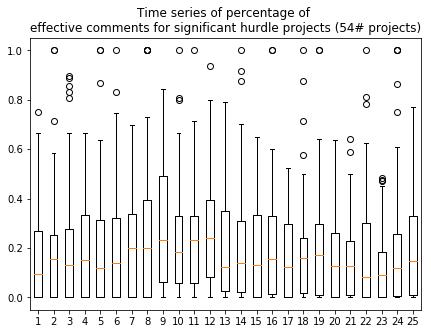

In [17]:
plt.figure(figsize=(7,5))



plt.boxplot(metrics_hurdle_significant)

plt.title("Time series of percentage of \neffective comments for significant hurdle projects ({}# projects)".format(len(metrics_hurdle_significant[0])))

plt.show()

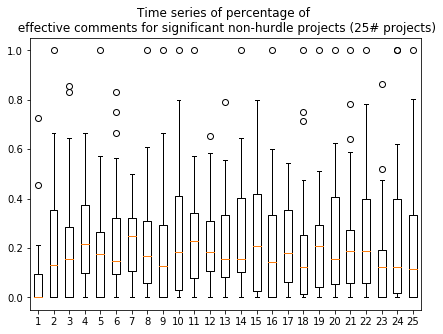

In [18]:
plt.figure(figsize=(7,5))



plt.boxplot(metrics_significant)

plt.title("Time series of percentage of \n effective comments for significant non-hurdle projects ({}# projects)".format(len(metrics_significant[0])))

plt.show()

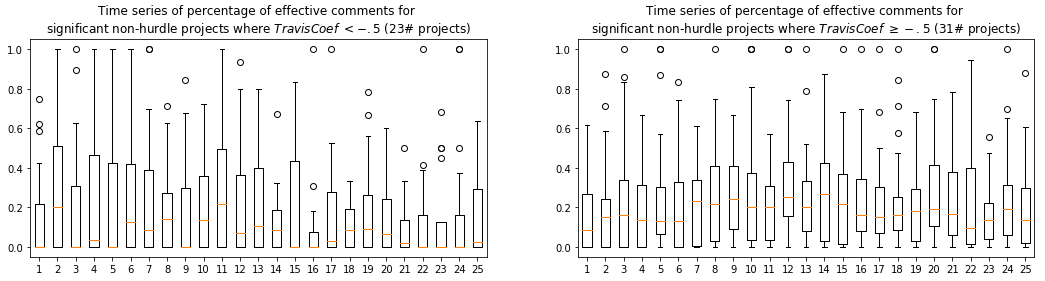

In [19]:
plt.figure(figsize=(18,4))

plt.subplot(1, 2, 1)

plt.boxplot(metrics_hurdle_large_neg)

plt.title("Time series of percentage of effective comments for \nsignificant non-hurdle projects where $TravisCoef\ < -.5$ ({}# projects)".format(len(metrics_hurdle_large_neg[0])))

plt.subplot(1, 2, 2)


plt.boxplot(metrics_hurdle_neg_to_pos)

plt.title("Time series of percentage of effective comments for \nsignificant non-hurdle projects where $TravisCoef\ \geq -.5$ ({}# projects)".format(len(metrics_hurdle_neg_to_pos[0])))

plt.show()

# Preparing the bigram data

We go through the hurdle projects, and feed all effective comments through the bigramizer, furthermore, we feed all non-effective comments through the bi-gramizer and maintain counters for them as well. We can then later analyze these two counters.

In [27]:
from ngramizer import add_text_ngrams_to_counter, compute_deltas

from collections import Counter

effective_counter = Counter()
non_effective_counter = Counter()

linkback_effective = {}
linkback_non_effective = {}

for project_name in hurdle_coefficients_data["ProjectName"]:
    project = projects_collection.find_one({'full_name': project_name})
    
    project["prs"] = list(pull_requests_collection.find({
        'project_name': project_name.split("/")[1],
        'project_owner': project_name.split("/")[0],
    }))
    
    
    for pr in project["prs"]:
        for comment in [comment for comment in pr["review_comments"] if comment["in_reply_to_id"] is None]:

            if "is_effective" in comment and comment["is_effective"] and "bigrams" in comment:
                bigrams = comment["bigrams"]
                
                for item in bigrams:
                    effective_counter[(item["bigram"][0], item["bigram"][1])] += item["occurrence"]
                
                
            elif "bigrams" in comment:
                bigrams = comment["bigrams"]
                
                for item in bigrams:
                    non_effective_counter[(item["bigram"][0], item["bigram"][1])] += item["occurrence"]
        

In [21]:
print("Effective: ")

for term in effective_counter.most_common(10):
    print("\t" + str(term))
    
print("Non Effective: ")

for term in non_effective_counter.most_common(10):
    print("\t" + str(term))

Effective: 
	(('M_ICODE', 'M_ICODE'), 500)
	(('use', 'M_ICODE'), 169)
	(('someth', 'like'), 89)
	(('like', 'M_ICODE'), 73)
	(('think', 'us'), 65)
	(('look', 'like'), 62)
	(('M_USERNAME', 'M_USERNAME'), 53)
	(('think', 'M_ICODE'), 50)
	(('make', 'sens'), 50)
	(('M_ICODE', 'would'), 47)
Non Effective: 
	(('M_ICODE', 'M_ICODE'), 3367)
	(('use', 'M_ICODE'), 1529)
	(('M_USERNAME', 'M_USERNAME'), 1078)
	(('single-quot', 'string'), 513)
	(('string', 'interpol'), 513)
	(('string', 'need'), 512)
	(('need', 'string'), 512)
	(('liter', 'span'), 491)
	(('align', 'element'), 473)
	(('prefer', 'single-quot'), 458)


In [38]:
'''
Given a counter and search terms prints out the n most occuring items which
match the search term
'''
def search_counter(counter, term, n):
    temp_counter = Counter()
    for item in counter:
        if term in item[0] or term in item[1]:
            temp_counter[item] = counter[item]
            
            
    for item in temp_counter.most_common(n):
        print(str(item[0]) + " - " + str(item[1]/ sum(counter.values()) * 100) + "%   |   " + str(item[1]))




search_counter(effective_counter, 'travis', 10)
        
print("-----------")

search_counter(non_effective_counter, 'travis', 10)

('make', 'travis-ci') - 0.0050347397039573055%   |   2
('travis-ci', 'build') - 0.0050347397039573055%   |   2
('confus', 'travis/appveyor') - 0.0025173698519786528%   |   1
('travis/appveyor', 'M_ICODE') - 0.0025173698519786528%   |   1
('think', 'travis-ci') - 0.0025173698519786528%   |   1
('fail', 'travis-ci') - 0.0025173698519786528%   |   1
('travis-ci', 'understand') - 0.0025173698519786528%   |   1
-----------
('build', 'travis-ci') - 0.0006620368224880668%   |   2
('travis-ci', 'fail') - 0.0006620368224880668%   |   2
('via', 'travis-ci') - 0.0006620368224880668%   |   2
('fine', 'travis-ci') - 0.0003310184112440334%   |   1
('travis-ci', 'still') - 0.0003310184112440334%   |   1
('travis-ci', 'check') - 0.0003310184112440334%   |   1
('fail', 'travis-ci') - 0.0003310184112440334%   |   1
('travis-ci', 'M_ICODE') - 0.0003310184112440334%   |   1
('make', 'travis-ci') - 0.0003310184112440334%   |   1
('travis-ci', 'log') - 0.0003310184112440334%   |   1


In [23]:
search_counter(effective_counter, 'build', 10)
        
print("-----------")

search_counter(non_effective_counter, 'build', 10)

('build', 'doc') - 0.007552109555935957%
('build', 'configur') - 0.0050347397039573055%
('opm-pars', 'build') - 0.0050347397039573055%
('build', 'process') - 0.0050347397039573055%
('part', 'build') - 0.0050347397039573055%
('travis-ci', 'build') - 0.0050347397039573055%
('actual', 'build') - 0.0050347397039573055%
('depend', 'build') - 0.0025173698519786528%
('cjson', 'build') - 0.0025173698519786528%
('build', 'system-wis') - 0.0025173698519786528%
-----------
('M_ICODE', 'build') - 0.004634257757416467%
('sphinx', 'build') - 0.003641202523684367%
('build', 'M_ICODE') - 0.0023171288787082337%
('tri', 'build') - 0.0023171288787082337%
('doc', 'build') - 0.0023171288787082337%
('build', 'doc') - 0.0019861104674642003%
('need', 'build') - 0.001655092056220167%
('build', 'list') - 0.001655092056220167%
('build', 'script') - 0.0013240736449761335%
('build', 'environ') - 0.0013240736449761335%


In [24]:
search_counter(effective_counter, 'failure', 10)
        
print("-----------")

search_counter(non_effective_counter, 'failure', 10)

('bool', 'failure/success') - 0.0025173698519786528%
('failure/success', 'add') - 0.0025173698519786528%
-----------


In [30]:
eff_to_non_effective, non_eff_to_effective = compute_deltas(effective_counter, non_effective_counter)

print("Appears in non effective")

for term in eff_to_non_effective.most_common(10):
    print("\t" + str(term))
    
print("Appears in effective: ")

for term in non_eff_to_effective.most_common(10):
    print("\t" + str(term))

Appears in non effective
	(('string', 'interpol'), 513)
	(('single-quot', 'string'), 513)
	(('need', 'string'), 512)
	(('liter', 'span'), 491)
	(('align', 'element'), 473)
	(('prefer', 'single-quot'), 458)
	(('hash', 'liter'), 441)
	(('element', 'hash'), 439)
	(('rubi', 'M_VERSION_NUMBER'), 301)
	(('new', 'rubi'), 286)
Appears in effective: 
	(('factori', 'class'), 10)
	(('stack', 'stack'), 6)
	(('stack', 'j'), 6)
	(('astropi', 'import'), 6)
	(('M_ICODE', 'vector'), 6)
	(('line', 'unit'), 4)
	(('stream', 'wrapper'), 4)
	(('M_ICODE', 'coordin'), 4)
	(('pt', 'unit'), 4)
	(('custom', 'stream'), 4)


In [32]:
sig_counter = Counter()
non_sig_counter = Counter()

linkback_sig = {}
linkback_non_sig = {}



for project_name in significant_hurdle["ProjectName"]:
    project = projects_collection.find_one({'full_name': project_name})
    
    project["prs"] = list(pull_requests_collection.find({
        'project_name': project_name.split("/")[1],
        'project_owner': project_name.split("/")[0],
    }))
        
    for pr in project["prs"]:
        for comment in [comment for comment in pr["raw_comments"] if 'bigrams' in comment]:
            for item in comment["bigrams"]:
                sig_counter[(item["bigram"][0], item["bigram"][1])] += item["occurrence"]

for project_name in non_sig_hurdle_data["ProjectName"]:
    project = projects_collection.find_one({'full_name': project_name})
    
    project["prs"] = list(pull_requests_collection.find({
        'project_name': project_name.split("/")[1],
        'project_owner': project_name.split("/")[0],
    }))
        
    for pr in project["prs"]:
        for comment in [comment for comment in pr["raw_comments"] if 'bigrams' in comment]:
            for item in comment["bigrams"]:
                non_sig_counter[(item['bigram'][0], item['bigram'][1])] += item["occurrence"]
        

In [39]:
search_counter(sig_counter, 'travis', 10)
        
print("-----------")

search_counter(non_sig_counter, 'travis', 10)

('travis-ci', 'build') - 0.0007227856540957877%   |   53
('travis-ci', 'fail') - 0.00036821155963370316%   |   27
('travis-ci', 'test') - 0.00027274930343237273%   |   20
('/home/travis/build/otwcode/otwarchive/vendor/bundle/ruby/', 'M_VERSION_NUMBER') - 0.00024547437308913546%   |   18
('.travis.yml', 'file') - 0.00021819944274589816%   |   16
('fail', 'travis-ci') - 0.00017728704723104225%   |   13
('travis-ci', 'error') - 0.0001636495820594236%   |   12
('M_USERNAME', 'travis.yml') - 0.0001636495820594236%   |   12
('M_MENTION', 'travis-ci') - 0.00013637465171618637%   |   10
('build', 'travis-ci') - 0.00012273718654456773%   |   9
-----------
('M_USERNAME', 'travis.yml') - 0.0002817573250050945%   |   37
('travis-ci', 'build') - 0.0002056066966253392%   |   27
('/home/travis/virtualenv/python', 'M_VERSION_NUMBER') - 0.00019799163378736366%   |   26
('.travis.yml', 'file') - 0.00019037657094938816%   |   25
('travis-ci', 'test') - 0.00018276150811141263%   |   24
('/home/travis/mini

In [34]:
search_counter(sig_counter, 'build', 10)
        
print("-----------")

search_counter(non_sig_counter, 'build', 10)

('travi', 'build') - 0.01018718648319912%
('build', 'fail') - 0.009641687876334374%
('remov', 'build') - 0.009150739130156103%
('build', 'pass') - 0.0048958499966110895%
('build', 'system') - 0.004323076459403107%
('tri', 'build') - 0.0042003392728585396%
('build', 'ome-') - 0.003941227434597785%
('build', 'failur') - 0.0037230279918518874%
('doc', 'build') - 0.0036002908053073194%
('updat', 'build') - 0.0033002665715317096%
-----------
('link', 'build') - 0.02500786635991163%
('build', 'result') - 0.018595983450336237%
('build', 'fail') - 0.01208510472386716%
('travi', 'build') - 0.01031841014545684%
('doc', 'build') - 0.008544100504208542%
('fail', 'build') - 0.00846033481299081%
('build', 'command') - 0.006838326428502023%
('build', 'failur') - 0.005444769929152501%
('build', 'system') - 0.004812719713600533%
('cd', '_build/latex') - 0.004264435189266294%


In [35]:
search_counter(sig_counter, 'failure', 10)
        
print("-----------")

search_counter(non_sig_counter, 'failure', 10)

('M_USERNAME', 'failure/error') - 0.001118272144072728%
('failure/error', 'resourc') - 0.00027274930343237273%
('failure/error', 'M_MENTION') - 0.00012273718654456773%
('failure/error', 'M_USERNAME') - 0.00010909972137294908%
('failure/error', 'expect') - 0.00010909972137294908%
('rais', 'self.failureexcept') - 6.818732585809318e-05%
('failure/error', 'puppet') - 4.09123955148559e-05%
('failure/error', 'lambda') - 4.09123955148559e-05%
('failure/error', 'provider.status.should') - 4.09123955148559e-05%
('fail', 'failures=1') - 2.727493034323727e-05%
-----------
('M_USERNAME', 'failure/error') - 0.00021322175946331476%
('rais', 'self.failureexcept') - 0.00017514644527343712%
('self.failureexcept', 'self.format_failur') - 0.00017514644527343712%
('failure/error', 'expect') - 0.0001142259425696329%
('syncmanagertest', 'testcustomsyncupwithfetchmodificationdatefailure|') - 6.853556554177974e-05%
('testcustomsyncupwithfetchmodificationdatefailure|', 'syncmanagertest') - 6.853556554177974e-0

In [36]:
sig_to_non_sig, non_sig_to_sig = compute_deltas(sig_counter, non_sig_counter)

print("Appears in non significant")

for term in sig_to_non_sig.most_common(10):
    print("\t" + str(term))
    
print("Appears in significant: ")

for term in non_sig_to_sig.most_common(10):
    print("\t" + str(term))

Appears in non significant
	(('M_VERSION_NUMBER', '-final-0'), 8407)
	(('white_check_mark', 'instal'), 6535)
	(('white_check_mark', 'lint'), 5146)
	(('sympi', 'bot'), 4715)
	(('bot', 'summari'), 4692)
	(('-final-0', 'pass'), 4345)
	(('pass', 'eight_spoked_asterisk'), 3162)
	(('eight_spoked_asterisk', 'python'), 3070)
	(('smiley', 'submiss'), 3031)
	(('submiss', 'pass'), 3031)
Appears in significant: 
	(('bot.io', 'linux'), 9417)
	(('live', 'output'), 8833)
	(('bot.io', 'window'), 8212)
	(('success', 'full'), 6773)
	(('window', 'receiv'), 4113)
	(('min', 'font'), 3926)
	(('linux', 'receiv'), 3786)
	(('viewer', 'http'), 3150)
	(('linux', 'success'), 3042)
	(('window', 'success'), 2950)
